# CPI Analysis and Prediction

This dataset holds CPI data for Ireland across various different sub-indicies, such as Alcohol and Tobacco. The goal is to create a linear regression model to predict CPI rise/fall in the coming years. 

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV data into a dataframe
file_path = '../datasets/CPM03.20241010092932.csv'
df_cpi = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df_cpi.head(10)

,STATISTIC,Statistic Label,TLIST(M1),Month,C01797V02862,Selected Sub Indices,UNIT,VALUE
0,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,1,Alcohol,Base Dec 2023=100,NaN
1,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,2,Tobacco,Base Dec 2023=100,NaN
2,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,A,CPI excluding Tobacco,Base Dec 2023=100,NaN
3,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,B,CPI excluding Housing,Base Dec 2023=100,NaN
4,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,C,CPI excluding Mortgage Interest,Base Dec 2023=100,NaN
5,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,D,CPI excluding Energy Products,Base Dec 2023=100,NaN
6,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,E,Energy Products,Base Dec 2023=100,NaN
7,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,G,Goods,Base Dec 2023=100,NaN
8,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,H,CPI excluding Energy and Unprocessed Food,Base Dec 2023=100,NaN
9,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,I,Services excluding Mortgage Interest,Base Dec 2023=100,NaN


In [83]:
# Print the shape of the dataframe
print("Shape of the dataframe:", df_cpi.shape)

# Describe the dataframe
print("Description of the dataframe:")
print(df_cpi.describe(include='all'))

Shape of the dataframe: (65632, 8)
Description of the dataframe:
       STATISTIC                           Statistic Label      TLIST(M1)  \
count      65632                                     65632   65632.000000   
unique         8                                         8            NaN   
top     CPM03C08  Consumer Price Index (Base Dec 2023=100)            NaN   
freq        8204                                      8204            NaN   
mean         NaN                                       NaN  199981.575085   
std          NaN                                       NaN    1409.980203   
min          NaN                                       NaN  197511.000000   
25%          NaN                                       NaN  198801.000000   
50%          NaN                                       NaN  200003.500000   
75%          NaN                                       NaN  201206.000000   
max          NaN                                       NaN  202408.000000   

          

In [84]:
# Print the amount of NaN values in each column
print("Amount of NaN values in each column:")
print(df_cpi.isna().sum())

Amount of NaN values in each column:
STATISTIC                   0
Statistic Label             0
TLIST(M1)                   0
Month                       0
C01797V02862                0
Selected Sub Indices        0
UNIT                        0
VALUE                   15167
dtype: int64


In [85]:
df_cpi = df_cpi.dropna()

# Print the amount of NaN values in each column
print("Amount of NaN values in each column:")
print(df_cpi.isna().sum())
print("Shape of the dataframe:", df_cpi.shape)

Amount of NaN values in each column:
STATISTIC               0
Statistic Label         0
TLIST(M1)               0
Month                   0
C01797V02862            0
Selected Sub Indices    0
UNIT                    0
VALUE                   0
dtype: int64
Shape of the dataframe: (50465, 8)


In [86]:
# Get alcohol data

# Filter the data for the 'Alcohol' sub-index
alcohol_data = df_cpi[df_cpi['Selected Sub Indices'] == 'Alcohol']
alcohol_data.head(10)


,STATISTIC,Statistic Label,TLIST(M1),Month,C01797V02862,Selected Sub Indices,UNIT,VALUE
5222,CPM03C08,Consumer Price Index (Base Dec 2023=100),200612,2006 December,1,Alcohol,Base Dec 2023=100,75.5
5236,CPM03C08,Consumer Price Index (Base Dec 2023=100),200701,2007 January,1,Alcohol,Base Dec 2023=100,75.9
5250,CPM03C08,Consumer Price Index (Base Dec 2023=100),200702,2007 February,1,Alcohol,Base Dec 2023=100,75.9
5264,CPM03C08,Consumer Price Index (Base Dec 2023=100),200703,2007 March,1,Alcohol,Base Dec 2023=100,76.7
5278,CPM03C08,Consumer Price Index (Base Dec 2023=100),200704,2007 April,1,Alcohol,Base Dec 2023=100,77.3
5292,CPM03C08,Consumer Price Index (Base Dec 2023=100),200705,2007 May,1,Alcohol,Base Dec 2023=100,77.5
5306,CPM03C08,Consumer Price Index (Base Dec 2023=100),200706,2007 June,1,Alcohol,Base Dec 2023=100,77.7
5320,CPM03C08,Consumer Price Index (Base Dec 2023=100),200707,2007 July,1,Alcohol,Base Dec 2023=100,77.7
5334,CPM03C08,Consumer Price Index (Base Dec 2023=100),200708,2007 August,1,Alcohol,Base Dec 2023=100,77.8
5348,CPM03C08,Consumer Price Index (Base Dec 2023=100),200709,2007 September,1,Alcohol,Base Dec 2023=100,77.8


In [87]:
# Filter the data to focus on the entries with "Base Dec 2023=100"
filtered_alcohol_data = alcohol_data[alcohol_data['UNIT'] == 'Base Dec 2023=100']
filtered_alcohol_data.head(10)

,STATISTIC,Statistic Label,TLIST(M1),Month,C01797V02862,Selected Sub Indices,UNIT,VALUE
5222,CPM03C08,Consumer Price Index (Base Dec 2023=100),200612,2006 December,1,Alcohol,Base Dec 2023=100,75.5
5236,CPM03C08,Consumer Price Index (Base Dec 2023=100),200701,2007 January,1,Alcohol,Base Dec 2023=100,75.9
5250,CPM03C08,Consumer Price Index (Base Dec 2023=100),200702,2007 February,1,Alcohol,Base Dec 2023=100,75.9
5264,CPM03C08,Consumer Price Index (Base Dec 2023=100),200703,2007 March,1,Alcohol,Base Dec 2023=100,76.7
5278,CPM03C08,Consumer Price Index (Base Dec 2023=100),200704,2007 April,1,Alcohol,Base Dec 2023=100,77.3
5292,CPM03C08,Consumer Price Index (Base Dec 2023=100),200705,2007 May,1,Alcohol,Base Dec 2023=100,77.5
5306,CPM03C08,Consumer Price Index (Base Dec 2023=100),200706,2007 June,1,Alcohol,Base Dec 2023=100,77.7
5320,CPM03C08,Consumer Price Index (Base Dec 2023=100),200707,2007 July,1,Alcohol,Base Dec 2023=100,77.7
5334,CPM03C08,Consumer Price Index (Base Dec 2023=100),200708,2007 August,1,Alcohol,Base Dec 2023=100,77.8
5348,CPM03C08,Consumer Price Index (Base Dec 2023=100),200709,2007 September,1,Alcohol,Base Dec 2023=100,77.8


In [88]:
# Plot the CPI for Alcohol with the base year "Dec 2023=100"
base = 'Dec 2011=100'


# Filter the data to focus on the entries with "Base Dec 2023=100"
filtered_alcohol_data = alcohol_data[alcohol_data['UNIT'] == f'Base {base}']

# Convert the 'Month' column to datetime format using .loc to avoid SettingWithCopyWarning
filtered_alcohol_data.loc[:, 'Month'] = pd.to_datetime(filtered_alcohol_data['Month'], format='%Y %B')

# Print shape
print("Shape of the filtered dataframe:", filtered_alcohol_data.shape)

Shape of the filtered dataframe: (502, 8)


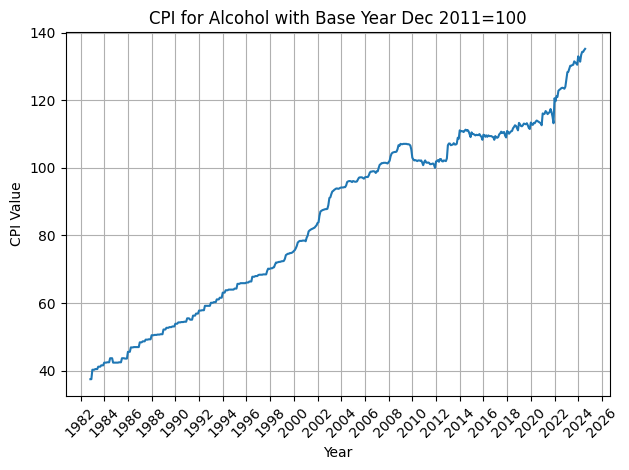

In [89]:
import matplotlib.dates as mdates

# Create the plot
fig, ax = plt.subplots()
ax.plot(filtered_alcohol_data['Month'], filtered_alcohol_data['VALUE'])

# Set major ticks for every 2 years
ax.xaxis.set_major_locator(mdates.YearLocator(2))

# Set x-axis to display only the year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.title(f'CPI for Alcohol with Base Year {base}')

# Display grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# convert Month to a numerical value where the oldest month is 0 and the newest month is the highest number
filtered_alcohol_data['Month'] = filtered_alcohol_data['Month'].rank()

X_train, X_test, y_train, y_test = train_test_split(filtered_alcohol_data['Month'], filtered_alcohol_data['VALUE'], test_size=0.2, random_state=72348)

model = LinearRegression()

# Reshape the data to fit the model
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model.fit(X_train, y_train)

# Get the R^2 score
r2 = model.score(X_test, y_test)
print(f'R^2 Score: {r2}')

R^2 Score: 0.9727212321579034


/tmp/ipykernel_20800/883878682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_alcohol_data['Month'] = filtered_alcohol_data['Month'].rank()


In [ ]:
# predict 2026
month_2026 = filtered_alcohol_data['Month'].max() + 1